<a href="https://colab.research.google.com/github/jjiguaran/text_mining/blob/master/individual_versions/Topics_noticias_reddit_edgar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Validacion de Resultados con Mcnemar test y modelos random

In [1]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from mlxtend.evaluate import mcnemar_table
import seaborn as sns
from sklearn.metrics import confusion_matrix
from mlxtend.evaluate import mcnemar

result = pd.read_csv("../results_test.csv")
result["Prediction_dia"].value_counts()

1    248
0    130
Name: Prediction_dia, dtype: int64

In [2]:
result.describe()

,Label,Prediction_dia
count,378.000000,378.000000
mean,0.507937,0.656085
std,0.500600,0.475643
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [3]:
result["Lastlabel"] = result["Label"].shift(1)
result["label1"] = 1
result["label0"] = 0
result.fillna(0,inplace=True)
result['random'] = np.random.randint(0, 2, result.shape[0])

In [4]:
scores=[]
n_samples= 100000
for i in range(n_samples):
    scores.append(accuracy_score(result["Label"],shuffle(result["Label"])))
# plt.hist(scores,bins=200)

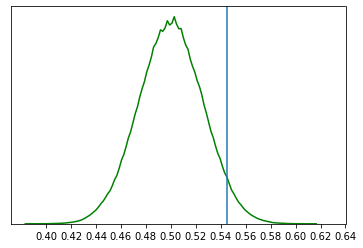

In [5]:
sns.kdeplot(scores,color ="green")
plt.xticks(np.arange(0.4,0.65,0.02))
plt.axvline(x=accuracy_score(result.Label, result.Prediction_dia))
plt.yticks([])
plt.show()

In [6]:
scores.sort(reverse=True)
a =[ n for n,i in enumerate(scores[:]) if i<=accuracy_score(result.Label, result.Prediction_dia) ][0]
a

3149

In [7]:
a/n_samples

0.03149

In [9]:
scores[5000]

0.5396825396825397

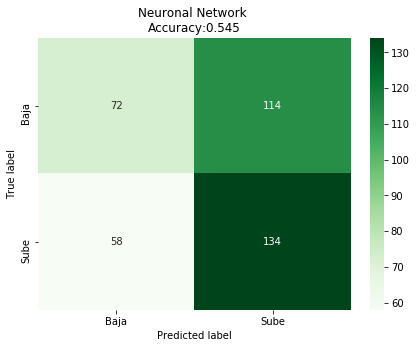

In [10]:
cm = confusion_matrix(result.Label, result.Prediction_dia) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['Baja','Sube'], 
                     columns = ['Baja','Sube'])
plt.figure(figsize=(7,5))
sns.heatmap(cm_df, annot=True, cmap="Greens", fmt='g')
plt.title('Neuronal Network \nAccuracy:{0:.3f}'.format(accuracy_score(result.Label, result.Prediction_dia)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [11]:
20/378

0.05291005291005291

In [12]:
result["Prediction_dia"].value_counts()

1    248
0    130
Name: Prediction_dia, dtype: int64

0.544973544973545
[[134  58]
 [ 72 114]]
0.544973544973545
[[134  58]
 [ 72 114]]
chi-squared: 1.5076923076923077
p-value: 0.21949155770198428


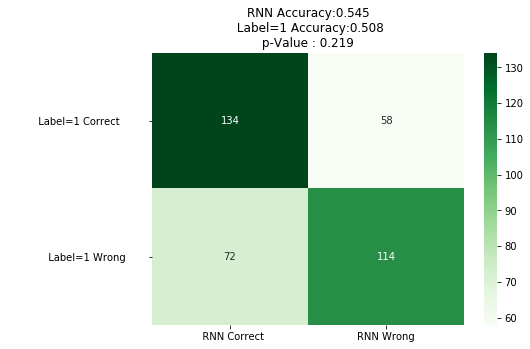

In [13]:

# # The correct target (class) labels
# y_target = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])
# # Class labels predicted by model 1
# y_model1 = np.array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0])
# # Class labels predicted by model 2
# y_model2 = np.array([0, 0, 1, 1, 0, 1, 1, 0, 0, 0])

tb = mcnemar_table(y_target=result["Label"], 
                   y_model1=result["Prediction_dia"], 
                   y_model2=result["label1"])
print(accuracy_score(result["Label"],result["Prediction_dia"]))
print(tb)

cm_df = pd.DataFrame(tb,
                     index = ['          Label=1 Correct        ','  Label=1 Wrong      '], 
                     columns = ['   RNN Correct ','RNN Wrong'])
plt.figure(figsize=(7,5))
sns.heatmap(cm_df, annot=True, cmap="Greens", fmt='g')
plt.title('RNN Accuracy:{0:.3f}\n Label=1 Accuracy:{1:.3f}\n p-Value : {2:.3f} '.format(accuracy_score(result["Label"], result["Prediction_dia"]),
                                                                           accuracy_score(result["Label"], result["label1"]),
                                                                           mcnemar(ary=tb, exact=False,corrected=False)[1],
                                                                          ))
# plt.ylabel('True label')
# plt.xlabel('Predicted label')

# tb_a = np.array([[9959, 11],
#                  [1, 29]])

chi2, p = mcnemar(ary=tb, exact=False,corrected=False)
print(accuracy_score(result["Label"],result["Prediction_dia"]))
print(tb)
print('chi-squared:', chi2)
print('p-value:', p)
plt.show()

In [14]:
(134+72)/len(result)

0.544973544973545

[[ 96  77]
 [110  95]]


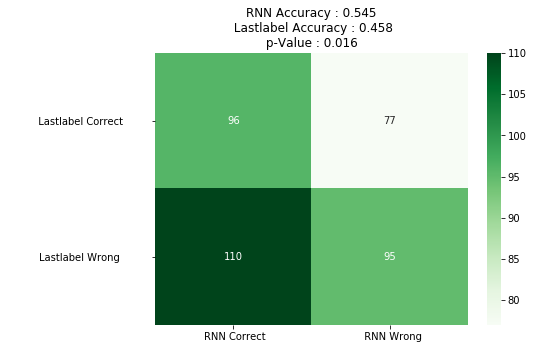

In [15]:
tb = mcnemar_table(y_target=result["Label"], 
                   y_model1=result["Prediction_dia"], 
                   y_model2=result["Lastlabel"])
print(tb)
cm_df = pd.DataFrame(tb,
                     index = ['          Lastlabel Correct        ','Lastlabel Wrong         '], 
                     columns =['        RNN Correct       ','  RNN Wrong'])
plt.figure(figsize=(7,5))
sns.heatmap(cm_df, annot=True, cmap="Greens", fmt='g')
plt.title('RNN Accuracy : {0:.3f}\n Lastlabel Accuracy : {1:.3f}\n p-Value : {2:.3f} '.format(accuracy_score(result["Label"], result["Prediction_dia"]),
                                                                           accuracy_score(result["Label"], result["Lastlabel"]),
                                                                           mcnemar(ary=tb, exact=False,corrected=False)[1],
                                                                          ))

plt.show()

In [16]:
confusion_matrix(result["Label"],result["Prediction_dia"])


array([[ 72, 114],
       [ 58, 134]], dtype=int64)

In [17]:
test = result.copy()

In [18]:
test

,Date,Label,Prediction_dia,Lastlabel,label1,label0,random
0,2015-01-02,1,0,0.0,1,0,0
1,2015-01-05,0,0,1.0,1,0,0
2,2015-01-06,0,1,0.0,1,0,1
3,2015-01-07,1,1,0.0,1,0,0
4,2015-01-08,1,1,1.0,1,0,1
...,...,...,...,...,...,...,...
373,2016-06-27,0,1,0.0,1,0,1
374,2016-06-28,1,0,0.0,1,0,0
375,2016-06-29,1,1,1.0,1,0,1
376,2016-06-30,1,1,1.0,1,0,0


In [19]:
test.loc[test["Lastlabel"] ==0,"Lastlabel_move"] = -1
test.loc[test["Lastlabel"] ==1,"Lastlabel_move"] = 1

test["acumulado1"] = test["label1"].cumsum()
test["acumuladolastlabel"] = test["Lastlabel_move"].cumsum()


In [20]:
test.loc[test["Prediction_dia"] ==0,"Prediction_move"] = -1
test.loc[test["Prediction_dia"] ==1,"Prediction_move"] = 1

test.loc[test["Label"] ==0,"realmove"] = -1
test.loc[test["Label"] ==1,"realmove"] = 1

test.loc[np.logical_and(test["Label"] == test["Prediction_dia"] , test["Label"] ==1)  ,"stockmove"] = 1
test.loc[np.logical_and(test["Label"] == test["Prediction_dia"] , test["Label"] ==0)  ,"stockmove"] = 0
test.loc[np.logical_and(test["Label"] != test["Prediction_dia"] , test["Label"] ==0)  ,"stockmove"] = -1
test.loc[np.logical_and(test["Label"] != test["Prediction_dia"] , test["Label"] ==1)  ,"stockmove"] = 0

test.loc[test["Label"] != test["Prediction_dia"]  ,"dsganancia"] = -1
test.loc[test["Label"] == test["Prediction_dia"]  ,"dsganancia"] = 1


test["Prediction_acumulado"] = test["Prediction_move"].cumsum()

test["realacumulado"] = test["realmove"].cumsum()
test["dsgananciaacumulada"] = test["dsganancia"].cumsum()
test["stockganancia"] = test["stockmove"].cumsum()

In [21]:
len(result)

378

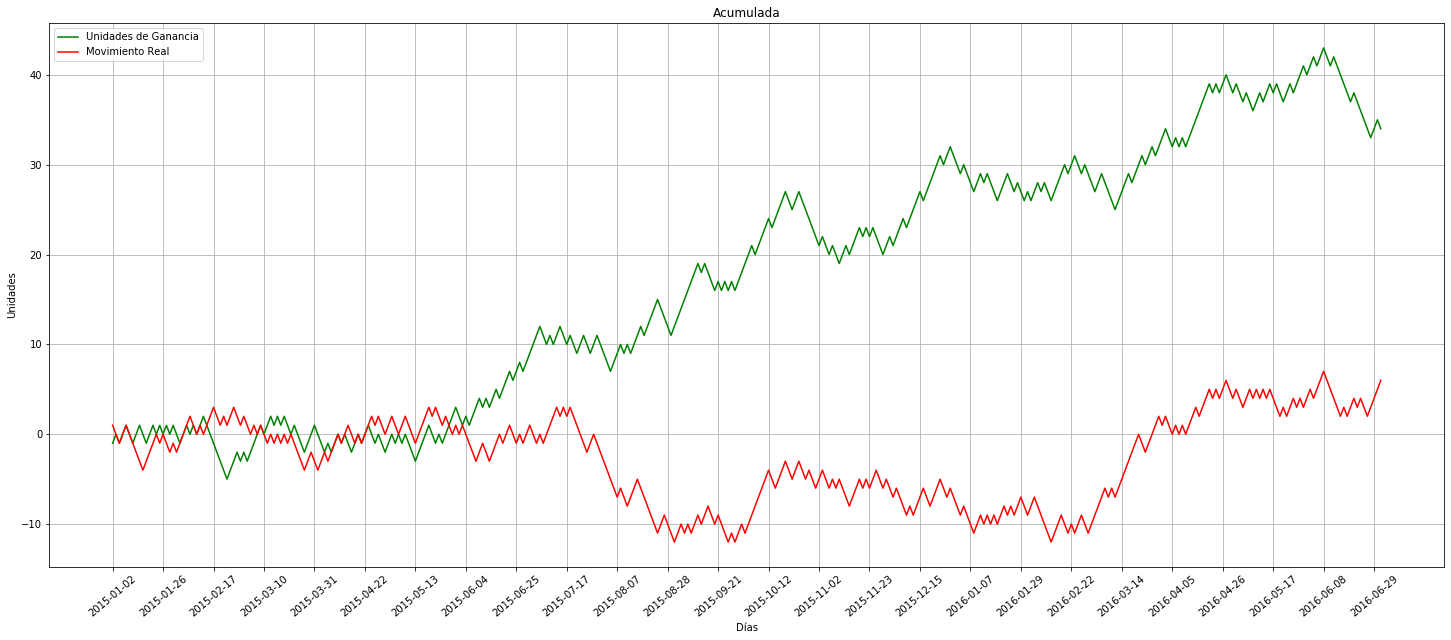

In [22]:
plt.figure(figsize=(25,10))

plt.plot(test['Date'], test['dsgananciaacumulada'],label="Unidades de Ganancia",color ="g")
plt.plot(test['Date'], test['realacumulado'],label="Movimiento Real", color = "red")
# plt.plot(test['Date'], test['Prediction_acumulado'],label="Movimiento Predicción", color = "b")

plt.legend(loc= 2)
plt.xlabel("Días")
plt.ylabel("Unidades")
plt.grid()
plt.title("Acumulada")
# plt.yticks(np.arange(0,121,10))
plt.xticks(np.arange(0,380,15), rotation=40);


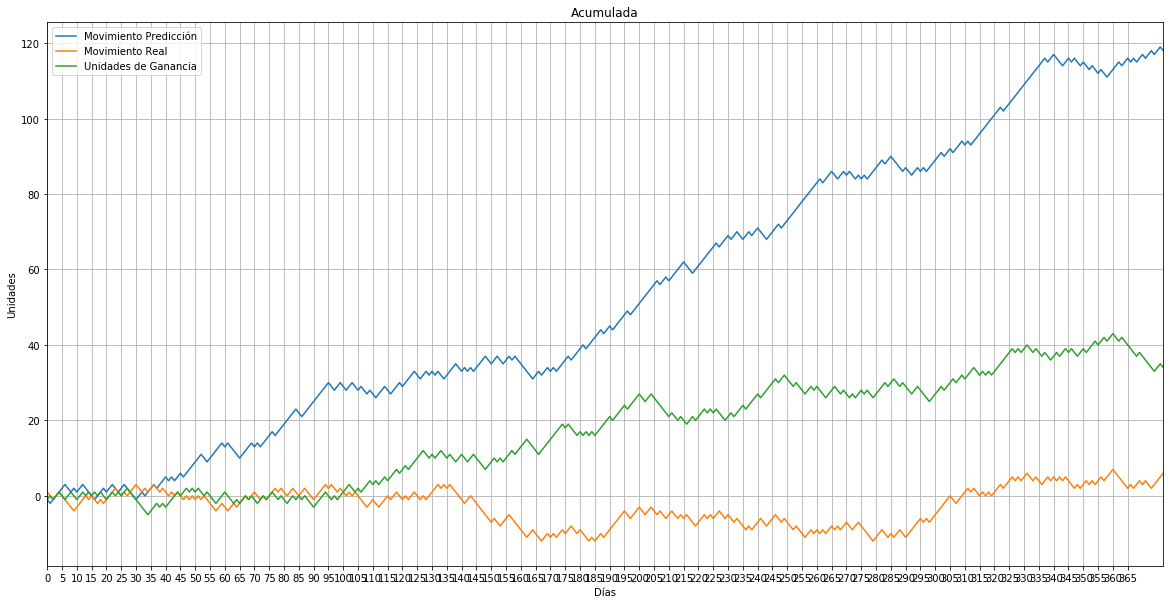

In [23]:
plt.figure(figsize=(20,10))
test["Prediction_acumulado"].plot(label="Movimiento Predicción")
test["realacumulado"].plot(label="Movimiento Real")
# test["acumulado1"].plot(label="Label=1")
# test["acumuladolastlabel"].plot(label="Lastlabel")
test["dsgananciaacumulada"].plot(label="Unidades de Ganancia")
# test["stockganancia"].plot(label="Ganancia Stocker")

plt.xlabel("Días")
plt.ylabel("Unidades")
plt.grid()
plt.title("Acumulada")
plt.xticks(np.arange(0,370,5))
plt.legend()